In [184]:
#import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
#load the dataset
waze_data = pd.read_csv("E:\\Data\\Road To data Science\\Datasets\\waze_dataset.csv")

In [186]:
waze_data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [187]:
waze_data.size

194987

In [188]:
waze_data.shape

(14999, 13)

In [189]:
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [190]:
waze_data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Begin by examining the spread and distribution of important variables using box plots and histograms.

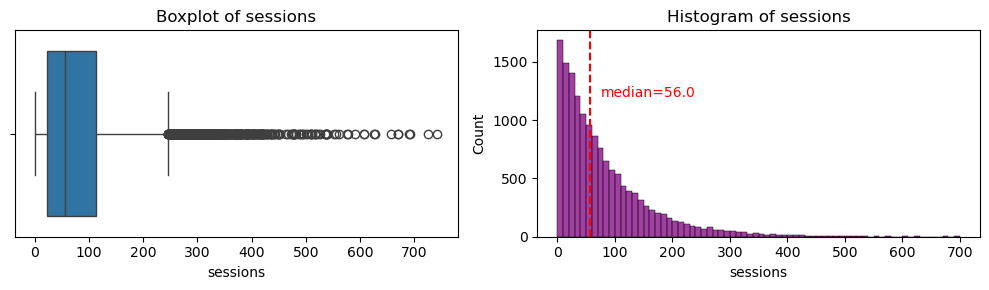

In [191]:
# sessions
#  The number of occurrences of a user opening the app during the month
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

# First subplot: Boxplot
sns.boxplot(x=waze_data['sessions'], ax=ax[0])
ax[0].set_title('Boxplot of sessions')

# Second subplot: Histogram
sns.histplot(x=waze_data['sessions'], bins=range(0, 701, 10), color='purple', ax=ax[1], kde=False)
ax[1].set_title('Histogram of sessions')
median = waze_data['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')

# Display the plots
plt.tight_layout()
plt.show()


Key Insights:
The sessions variable follows a right-skewed distribution.
50% of users have 56 or fewer sessions (as indicated by the median).
Some users, however, have significantly higher session counts, with values exceeding 700, as highlighted by the boxplot.

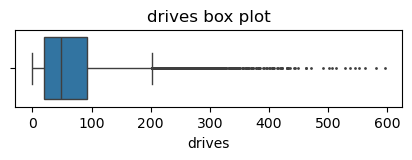

In [192]:
#drives
#An occurrence of driving at least 1 km during the month
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=waze_data['drives'], fliersize=1)
plt.title('drives box plot');
#

In [193]:
#helper function to plot histograms based on the format of the 'sessions' histogram
def histogrammer(column_str, median_text=True, **kwargs):
    median = round(waze_data[column_str].median(), 1)  # Calculate the median of the specified column, rounded to 1 decimal place
    plt.figure(figsize=(5,3))                   # Set the figure size for the plot (5 units wide by 3 units tall)
    ax = sns.histplot(x=waze_data[column_str], **kwargs)  # Plot the histogram using Seaborn's `histplot` function
                                                  # **kwargs allows additional keyword arguments to be passed
                                                  # to `sns.histplot()`, e.g., `bins`, `color`, etc.
    plt.axvline(median, color='red', linestyle='--')  # Add a vertical red dashed line at the median value
    if median_text == True:                           # If `median_text` is True, display the median value on the plot
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)  # Place the text with the median value on the plot
                                                          # `ax.transAxes` transforms coordinates relative to the axes
    else:
        print('Median:', median)                        # If `median_text` is False, print the median instead
    plt.title(f'{column_str} histogram')                # Set the title of the plot based on the column name


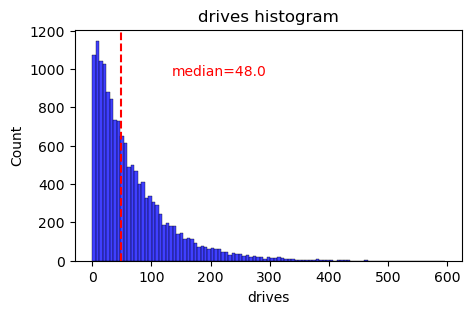

In [194]:
# Histogram
histogrammer('drives',color='blue')

Key Insights:
The drives variable follows a distribution similar to sessions.
It is right-skewed and approximately log-normal.
The median number of drives is 48.
Some drivers had over 400 drives in the last month, indicating a small number of highly active users.

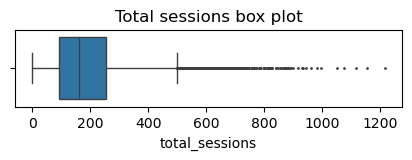

In [195]:
#total_sessions
#A model estimate of the total number of sessions since a user has onboarded
#box plot
plt.figure(figsize=(5,1))
plt.title("Total sessions box plot")
sns.boxplot(x=waze_data['total_sessions'],fliersize=1);

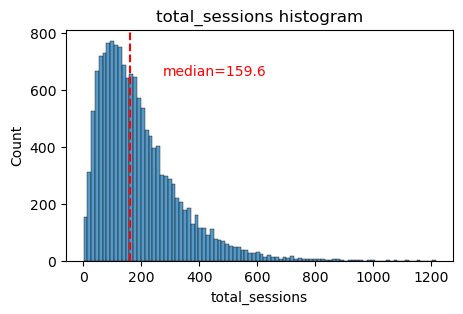

In [196]:
histogrammer('total_sessions')

**Key Insights:**
The total_sessions variable is right-skewed, with a median of 159.6 sessions.
This suggests that a large proportion of a user's total sessions might have occurred in the last month.
Given that the median number of sessions in the last month was 56, a significant portion of total drives may have been concentrated in this recent period.
This is an interesting trend worth exploring further in future analyses.

Median: 1741.0


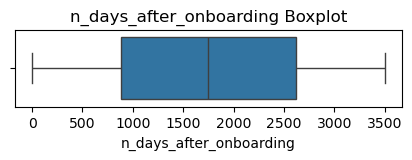

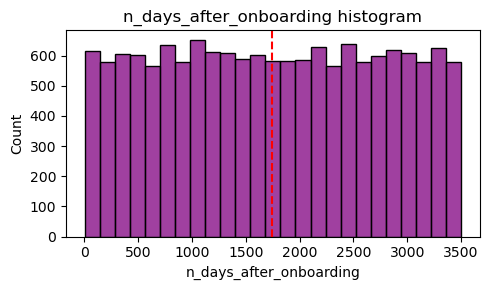

In [197]:
#n_days_after_onboarding
#The number of days since a user signed up for the app

# Boxplot
plt.figure( figsize=(5, 1))
sns.boxplot(x=waze_data['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding Boxplot');

# Histogram
histogrammer('n_days_after_onboarding', median_text=False,color = 'purple')

# Display the plots
plt.tight_layout()
plt.show()

**Key Insights:**
The user tenure (number of days since onboarding) follows a uniform distribution.
The values range from near-zero to approximately 3,500 days (around 9.5 years).
This suggests that users have been onboarded consistently over time, with no specific peaks in the distribution.

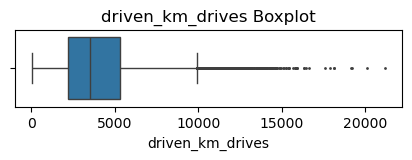

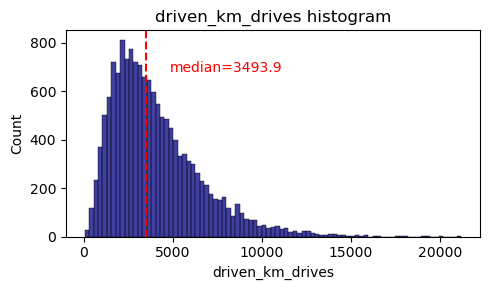

In [198]:
#driven_km_drives
#Total kilometers driven during the month
plt.figure( figsize=(5, 1))
# Boxplot
sns.boxplot(x=waze_data['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives Boxplot');

# Histogram
histogrammer('driven_km_drives',color = 'navy')

# Display the plots
plt.tight_layout()
plt.show()

**Key Insights:**
The number of drives in the last month per user is right-skewed.
50% of users drove less than 3,495 kilometers.
As seen in the previous analysis, users in this dataset tend to drive significant distances.
Notably, the longest distance driven in the last month exceeded half the circumference of the Earth!

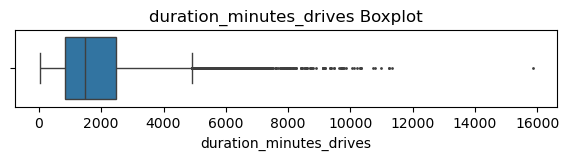

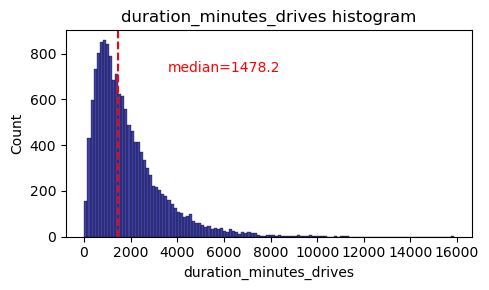

In [199]:
#duration_minutes_drives
#Total duration driven in minutes during the month
plt.figure( figsize=(7, 1))
# Boxplot
sns.boxplot(x=waze_data['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives Boxplot');

# Histogram
histogrammer('duration_minutes_drives',color = 'navy')

# Display the plots
plt.tight_layout()
plt.show()

**Key Insights:**
The duration_minutes_drives variable is heavily right-skewed.
50% of users drove for less than ~1,478 minutes (~25 hours) over the month.
However, a small number of users logged over 250 hours of driving in the same period, indicating a wide range in driving time among users.

Median: 16.0


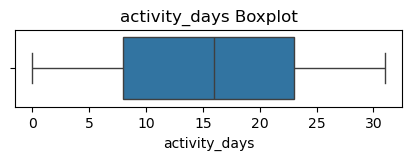

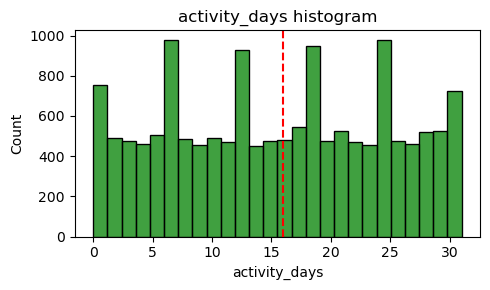

In [200]:
#activity_days
#Number of days the user opens the app during the month
plt.figure( figsize=(5, 1))
# Boxplot
sns.boxplot(x=waze_data['activity_days'], fliersize=1)
plt.title('activity_days Boxplot');

# Histogram
histogrammer('activity_days',median_text=False,color = 'g')

# Display the plots
plt.tight_layout()
plt.show()

**Key Insights:**
Within the last month, users opened the app a median of 16 times.
The box plot indicates a centered distribution.
The histogram displays a nearly uniform distribution, with approximately 500 users opening the app on each count of days.
Notably, there are around 250 users who didn't open the app at all, while another 250 users opened the app every day of the month.
This distribution is significant because it does not mirror the sessions distribution, suggesting that it may not be closely correlated with activity_days.

Median: 12.0


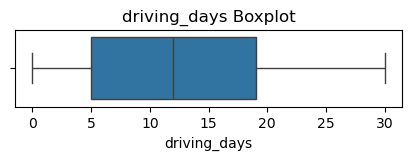

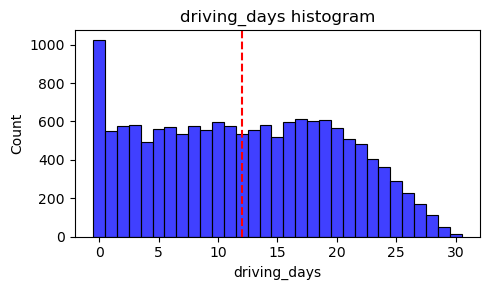

In [201]:
#driving_days
#Number of days the user drives (at least 1 km) during the month
plt.figure( figsize=(5, 1))
# Boxplot
sns.boxplot(x=waze_data['driving_days'], fliersize=1)
plt.title('driving_days Boxplot');

# Histogram
histogrammer('driving_days',median_text=False,color = 'b',discrete = True)

# Display the plots
plt.tight_layout()
plt.show()

**Key Insights:**
The number of days users drove each month shows an almost uniform distribution.
This distribution largely correlates with the number of days users opened the app that month, although the driving_days distribution tails off on the right.
Interestingly, there were almost twice as many users (~1,000) who did not drive at all during the month compared to those who did (~550).
This finding may seem counterintuitive when considered alongside the activity_days variable:
Approximately 500 users opened the app on most of the day counts.
Conversely, there were only ~250 users who did not open the app at all during the month and ~250 users who opened the app every day

Text(0.5, 1.0, 'Users by device')

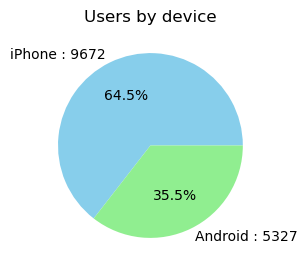

In [202]:
#device
#The type of device a user starts a session with

#This is a categorical variable, so you do not plot a box plot for it. 
#A good plot for a binary categorical variable is a pie chart.

#pie chart
fig = plt.figure(figsize=(3,3))
data = waze_data['device'].value_counts()
colors = ['skyblue', 'lightgreen'] 
plt.pie(data, colors=colors,
        labels = [f'{data.index[0]} : {data.values[0]}',
                  f'{data.index[1]} : {data.values[1]}'],
                  autopct = '%1.1f%%'  )

plt.title('Users by device')

There are nearly twice as many iPhone users as Android users represented in this data.

Text(0.5, 1.0, 'Count of retained vs. churned')

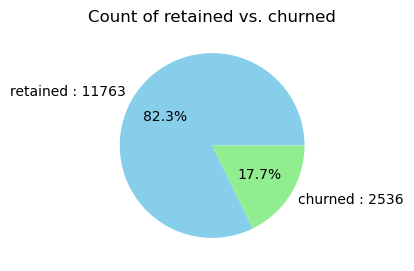

In [203]:
fig = plt.figure(figsize=(3,3))
data = waze_data['label'].value_counts()
colors = ['skyblue', 'lightgreen'] 
plt.pie(data, colors=colors,
        labels= [f'{data.index[0]} : {data.values[0]}',
                 f'{data.index[1]} : {data.values[1]}'],
                 autopct= '%1.1f%%')
plt.title('Count of retained vs. churned')

Less than 18% of the users churned

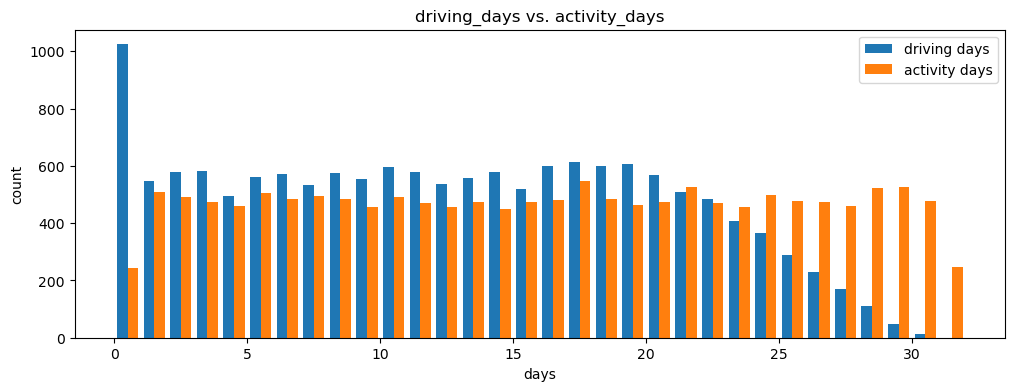

In [204]:
#driving_days vs. activity_days
#Because both driving_days and activity_days represent counts of days over a month and they're also closely related, you can plot them together on a single histogram.
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([waze_data['driving_days'], waze_data['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

In [205]:
print(waze_data['driving_days'].max())
print(waze_data['activity_days'].max())

30
31


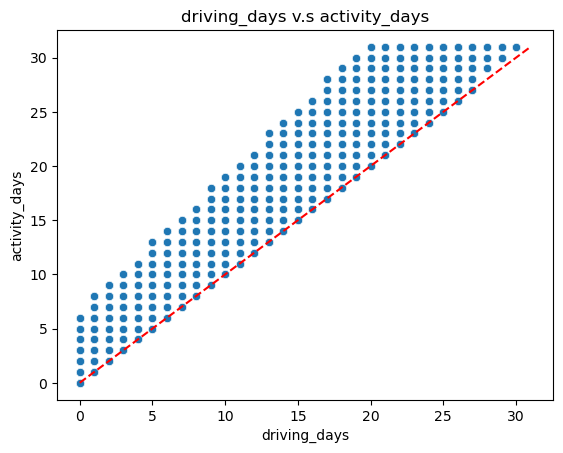

In [206]:
#Scatter plot 
sns.scatterplot(data=waze_data,x='driving_days',y='activity_days')
plt.title('driving_days v.s activity_days')
plt.plot([0,31],[0,31],color = 'red',linestyle = '--');

**Key Insights:**
It is important to note that there is a theoretical limit in the data:
If users use the app to drive, it must count as a day-use as well.
This means that you cannot have more drive-days than activity-days.
None of the samples in this dataset violate this rule, which is a positive indication of data integrity.

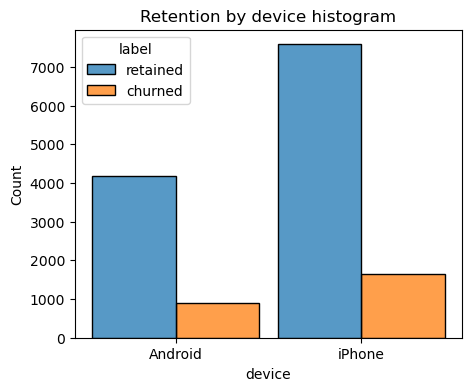

In [207]:
# Histogram Retention by device
plt.figure(figsize=(5,4))
sns.histplot(data=waze_data,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

In [208]:
#Retention by kilometers driven per driving day
# 1. Create `km_per_driving_day` column
waze_data['km_per_driving_day'] = waze_data['driven_km_drives'] / waze_data['driving_days']

# 2. Call `describe()` on the new column
waze_data['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [209]:
# 1. Convert infinite values to zero
waze_data.loc[waze_data['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0
# 2. Confirm that it worked
waze_data['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

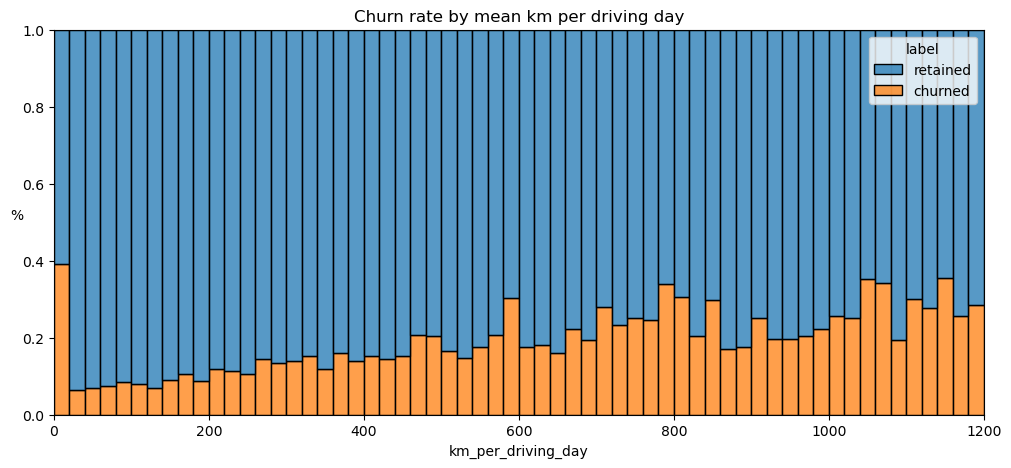

In [210]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=waze_data,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

**Key Insights:**
The churn rate tends to increase as the mean daily distance driven increases.
This finding confirms previous insights from earlier analyses.
It would be valuable to investigate further the reasons why long-distance users discontinue using the app.

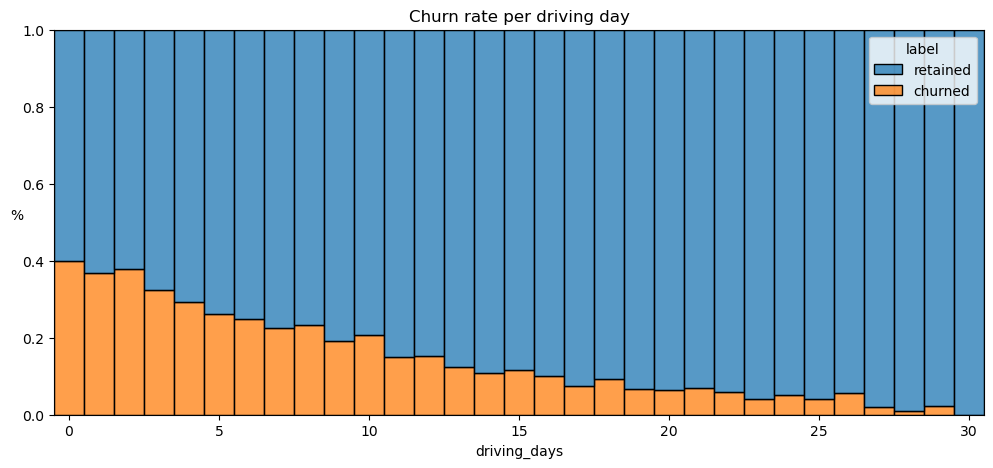

In [211]:
# Histogram Churn rate per number of driving days
plt.figure(figsize=(12,5))
sns.histplot(data=waze_data,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

Key Insights:
The churn rate is highest among users who didn't use Waze much during the last month.
The more frequently users engage with the app, the less likely they are to churn:
40% of users who didn’t use the app at all last month churned.
In contrast, nobody who used the app for all 30 days churned.
This trend is not surprising; if highly active users were to churn, it could indicate dissatisfaction with the app.
Conversely, when less active users churn, it might stem from:
Past dissatisfaction with the app, or
A decreased need for a navigational app, possibly due to moving to a city with better public transportation options or a lifestyle change that reduces the necessity to drive.

In [212]:
#Proportion of sessions that occurred in the last month
waze_data["percent_sessions_in_last_month"] = waze_data['sessions']/waze_data['total_sessions']

In [213]:
waze_data['percent_sessions_in_last_month'].median()

0.42309702992763176

Median: 0.4


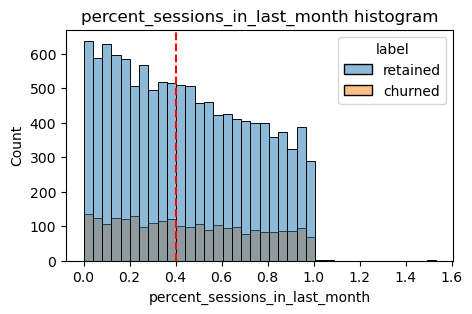

In [214]:
# Histogram
histogrammer('percent_sessions_in_last_month',
             hue=waze_data['label'],
             multiple='layer',
             median_text=False)

In [215]:
waze_data['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

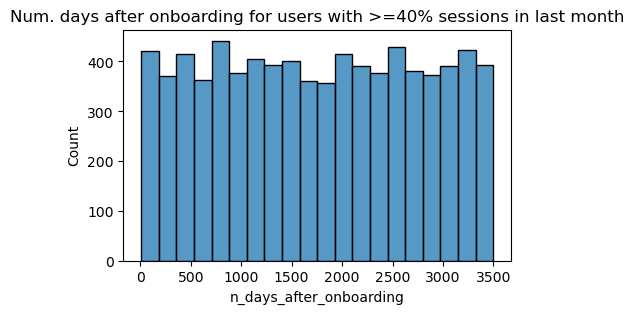

In [216]:
# Histogram
data = waze_data.loc[waze_data['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

Key Insights:
The number of days since onboarding for users who have 40% or more of their total sessions occurring in just the last month follows a uniform distribution.
This observation is quite strange and raises questions.
It would be valuable to ask Waze why so many long-time users suddenly increased their app usage in the last month.

In [217]:
#handling outliers
def outlier_imputer(column_name,percentile):
    #calculate threshold
    threshold = waze_data[column_name].quantile(percentile)
    #impute threshold for values > than threshold
    waze_data.loc[waze_data[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name,percentile,threshold))

In [218]:
for column in ['sessions','drives','total_sessions','driven_km_drives',
               'duration_minutes_drives']:
              outlier_imputer(column,0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [219]:
waze_data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


Conclusion
The analysis revealed that the overall churn rate is approximately 17%, with this rate being consistent between iPhone and Android users.

As you delve deeper into the data, it's common for more questions to arise. In this case, it would be valuable to ask the Waze data team why so many users increased their app usage significantly in just the last month.

Additionally, exploratory data analysis (EDA) has shown that:

Users who drive very long distances on their driving days are more likely to churn.
Conversely, users who drive more frequently are less likely to churn.
Understanding the reasons behind this discrepancy presents an opportunity for further investigation, which is another pertinent question to discuss with the Waze data team.